In [1]:
import glob
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CV vs Leader board

In [2]:
leaderboard = pd.read_csv('LeaderBoard.csv').sort_values('Filename', ascending=False)
leaderboard

Filename  Metric
17  022_submission.csv  0.8180
16  021_submission.csv  0.7541
15  019_submission.csv  1.1202
14  018_submission.csv  0.9745
13  017_submission.csv  0.7677
12  015_submission.csv  0.8597
11  014_submission.csv  0.9336
10  013_submission.csv  0.9937
9   012_submission.csv  0.8149
8   011_submission.csv  0.9155
7   010_submission.csv  0.9357
6   009_submission.csv  0.9492
5   008_submission.csv  0.9081
4   006_submission.csv  1.0286
3   005_submission.csv  0.8728
2   004_submission.csv  1.2826
1   002_submission.csv  1.0718
0   001_submission.csv  1.0594

In [3]:
metrics = []
for filepath in glob.glob(os.path.join('exp*', 'metrics.json')):
    with open(filepath, 'r') as f:
        metric = json.load(f)
    cv = metric['valid_losses_avg']
    dirname = os.path.split(os.path.dirname(filepath))[-1]
    submission_filename = dirname.replace('exp', '') + '_submission.csv'
    metrics.append([submission_filename, cv])
metrics = pd.DataFrame(data=metrics, columns=['Filename', 'CV']).sort_values('Filename', ascending=False)
metrics

Filename        CV
19  022_submission.csv  0.831849
18  021_submission.csv  0.790173
17  019_submission.csv  1.132066
16  018_submission.csv  0.983642
15  017_submission.csv  0.815681
14  015_submission.csv  0.869856
13  014_submission.csv  0.944737
12  013_submission.csv  1.001959
11  012_submission.csv  0.841569
10  011_submission.csv  0.924003
9   010_submission.csv  0.944536
8   009_submission.csv  0.968231
7   008_submission.csv  0.908720
6   007_submission.csv  0.971659
5   006_submission.csv  1.032317
4   005_submission.csv  0.880975
3   004_submission.csv  1.339520
2   003_submission.csv  1.183930
1   002_submission.csv  1.082669
0   001_submission.csv  1.064736

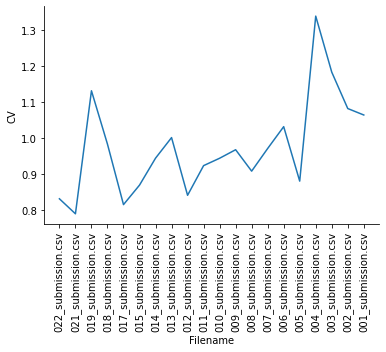

In [4]:
ax = sns.lineplot(data=metrics, x='Filename', y='CV')
plt.xticks(rotation=90)
sns.despine()

In [5]:
cv_lb = pd.merge(metrics, leaderboard, how='left').sort_values('Filename', ascending=False)
cv_lb

Filename        CV  Metric
0   022_submission.csv  0.831849  0.8180
1   021_submission.csv  0.790173  0.7541
2   019_submission.csv  1.132066  1.1202
3   018_submission.csv  0.983642  0.9745
4   017_submission.csv  0.815681  0.7677
5   015_submission.csv  0.869856  0.8597
6   014_submission.csv  0.944737  0.9336
7   013_submission.csv  1.001959  0.9937
8   012_submission.csv  0.841569  0.8149
9   011_submission.csv  0.924003  0.9155
10  010_submission.csv  0.944536  0.9357
11  009_submission.csv  0.968231  0.9492
12  008_submission.csv  0.908720  0.9081
13  007_submission.csv  0.971659     NaN
14  006_submission.csv  1.032317  1.0286
15  005_submission.csv  0.880975  0.8728
16  004_submission.csv  1.339520  1.2826
17  003_submission.csv  1.183930     NaN
18  002_submission.csv  1.082669  1.0718
19  001_submission.csv  1.064736  1.0594

CV    Metric
CV      1.000000  0.993277
Metric  0.993277  1.000000

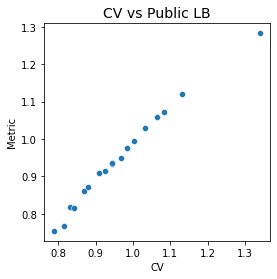

In [6]:
ax = sns.scatterplot(data=cv_lb, x='CV', y='Metric')
ax.set_aspect('equal')
ax.set_title('CV vs Public LB', fontsize=14)
display(cv_lb.corr())

# Compare submission files

## Corerration matrix

In [7]:
submissions = pd.DataFrame()
for filepath in glob.glob(os.path.join('exp*', '*_submission.csv')):
    df = pd.read_csv(filepath)
    submissions[os.path.split(filepath)[0]] = df['target'].values
submissions

exp001  exp002  exp003  exp004    exp005  exp006  exp007    exp008  \
0          1       1       1       3  1.442023       1       2  1.239809   
1          1       1       3       3  1.402051       2       2  1.815694   
2          2       2       2       2  1.738327       2       2  1.617090   
3          3       3       2       3  1.583645       2       2  2.303409   
4          1       1       3       0  1.224837       2       2  0.241458   
...      ...     ...     ...     ...       ...     ...     ...       ...   
5914       3       3       2       1  2.628905       3       3  2.686372   
5915       2       1       2       2  1.519208       2       2  1.045690   
5916       2       2       2       3  1.920784       2       2  1.764494   
5917       2       2       3       2  1.823713       2       2  2.368674   
5918       2       2       1       2  1.249824       2       2  1.282707   

        exp009    exp010    exp011    exp012    exp013    exp014    exp015  \
0     1.616103  1.800699  1.281646  1.381510  1.359499  1.713416  1.471824   
1     1.680383  1.628654  1.831477  2.124715  1.600978  1.911725  2.243007   
2     2.053622  1.618650  1.437796  1.745142  1.437638  1.733731  1.841505   
3     2.072835  1.980978  2.778739  2.052668  1.573111  1.846000  2.075149   
4     1.763209  0.627268  0.146694  0.757593  1.264272  1.554714  1.022645   
...        ...       ...       ...       ...       ...       ...       ...   
5914  1.529808  3.000000  2.925492  2.094619  1.524288  1.778010  2.156700   
5915  1.285213  0.912846  1.123205  1.014373  1.195330  1.640011  1.252806   
5916  2.297179  1.792497  2.191094  1.687071  1.572988  1.749683  1.745245   
5917  2.019712  2.760527  1.866233  1.776740  1.377473  1.648193  1.572389   
5918  1.673655  0.732706  0.878667  1.427988  1.509477  1.695947  1.879474   

        exp017    exp018    exp019    exp021    exp022  
0     1.188011  1.267909  0.702952  1.022467  1.318512  
1     2.305221  2.416540  0.752515  2.181247  2.390193  
2     1.911501  2.216537  1.100579  2.008543  1.693536  
3     2.269300  2.078816  0.860864  2.164019  1.958889  
4     0.612280  0.158615  0.572621  0.498246  0.713945  
...        ...       ...       ...       ...       ...  
5914  2.028192  3.000000  2.291421  2.173320  2.226715  
5915  1.003473  1.021202  0.736223  0.961325  1.274652  
5916  1.452754  1.619267  1.212506  1.536181  1.686002  
5917  1.772588  2.368650  1.400596  1.964261  1.847895  
5918  1.243363  1.238191  0.742198  1.000691  1.462148  

[5919 rows x 20 columns]

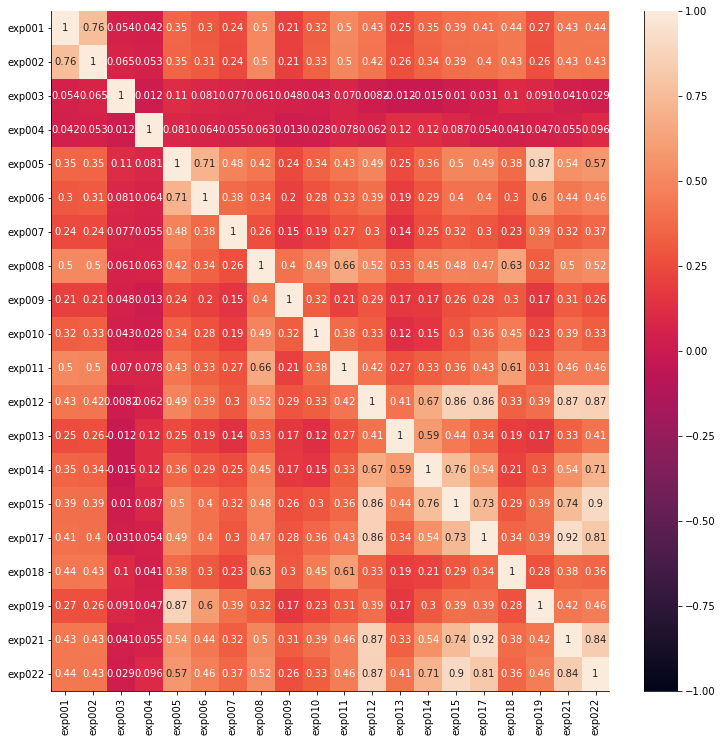

In [8]:
plt.figure(figsize=(12.5, 12.5))
sns.heatmap(submissions.corr(), vmin=-1, vmax=1, annot=True)
sns.despine()

## Pairplot

<Figure size 612x612 with 0 Axes>

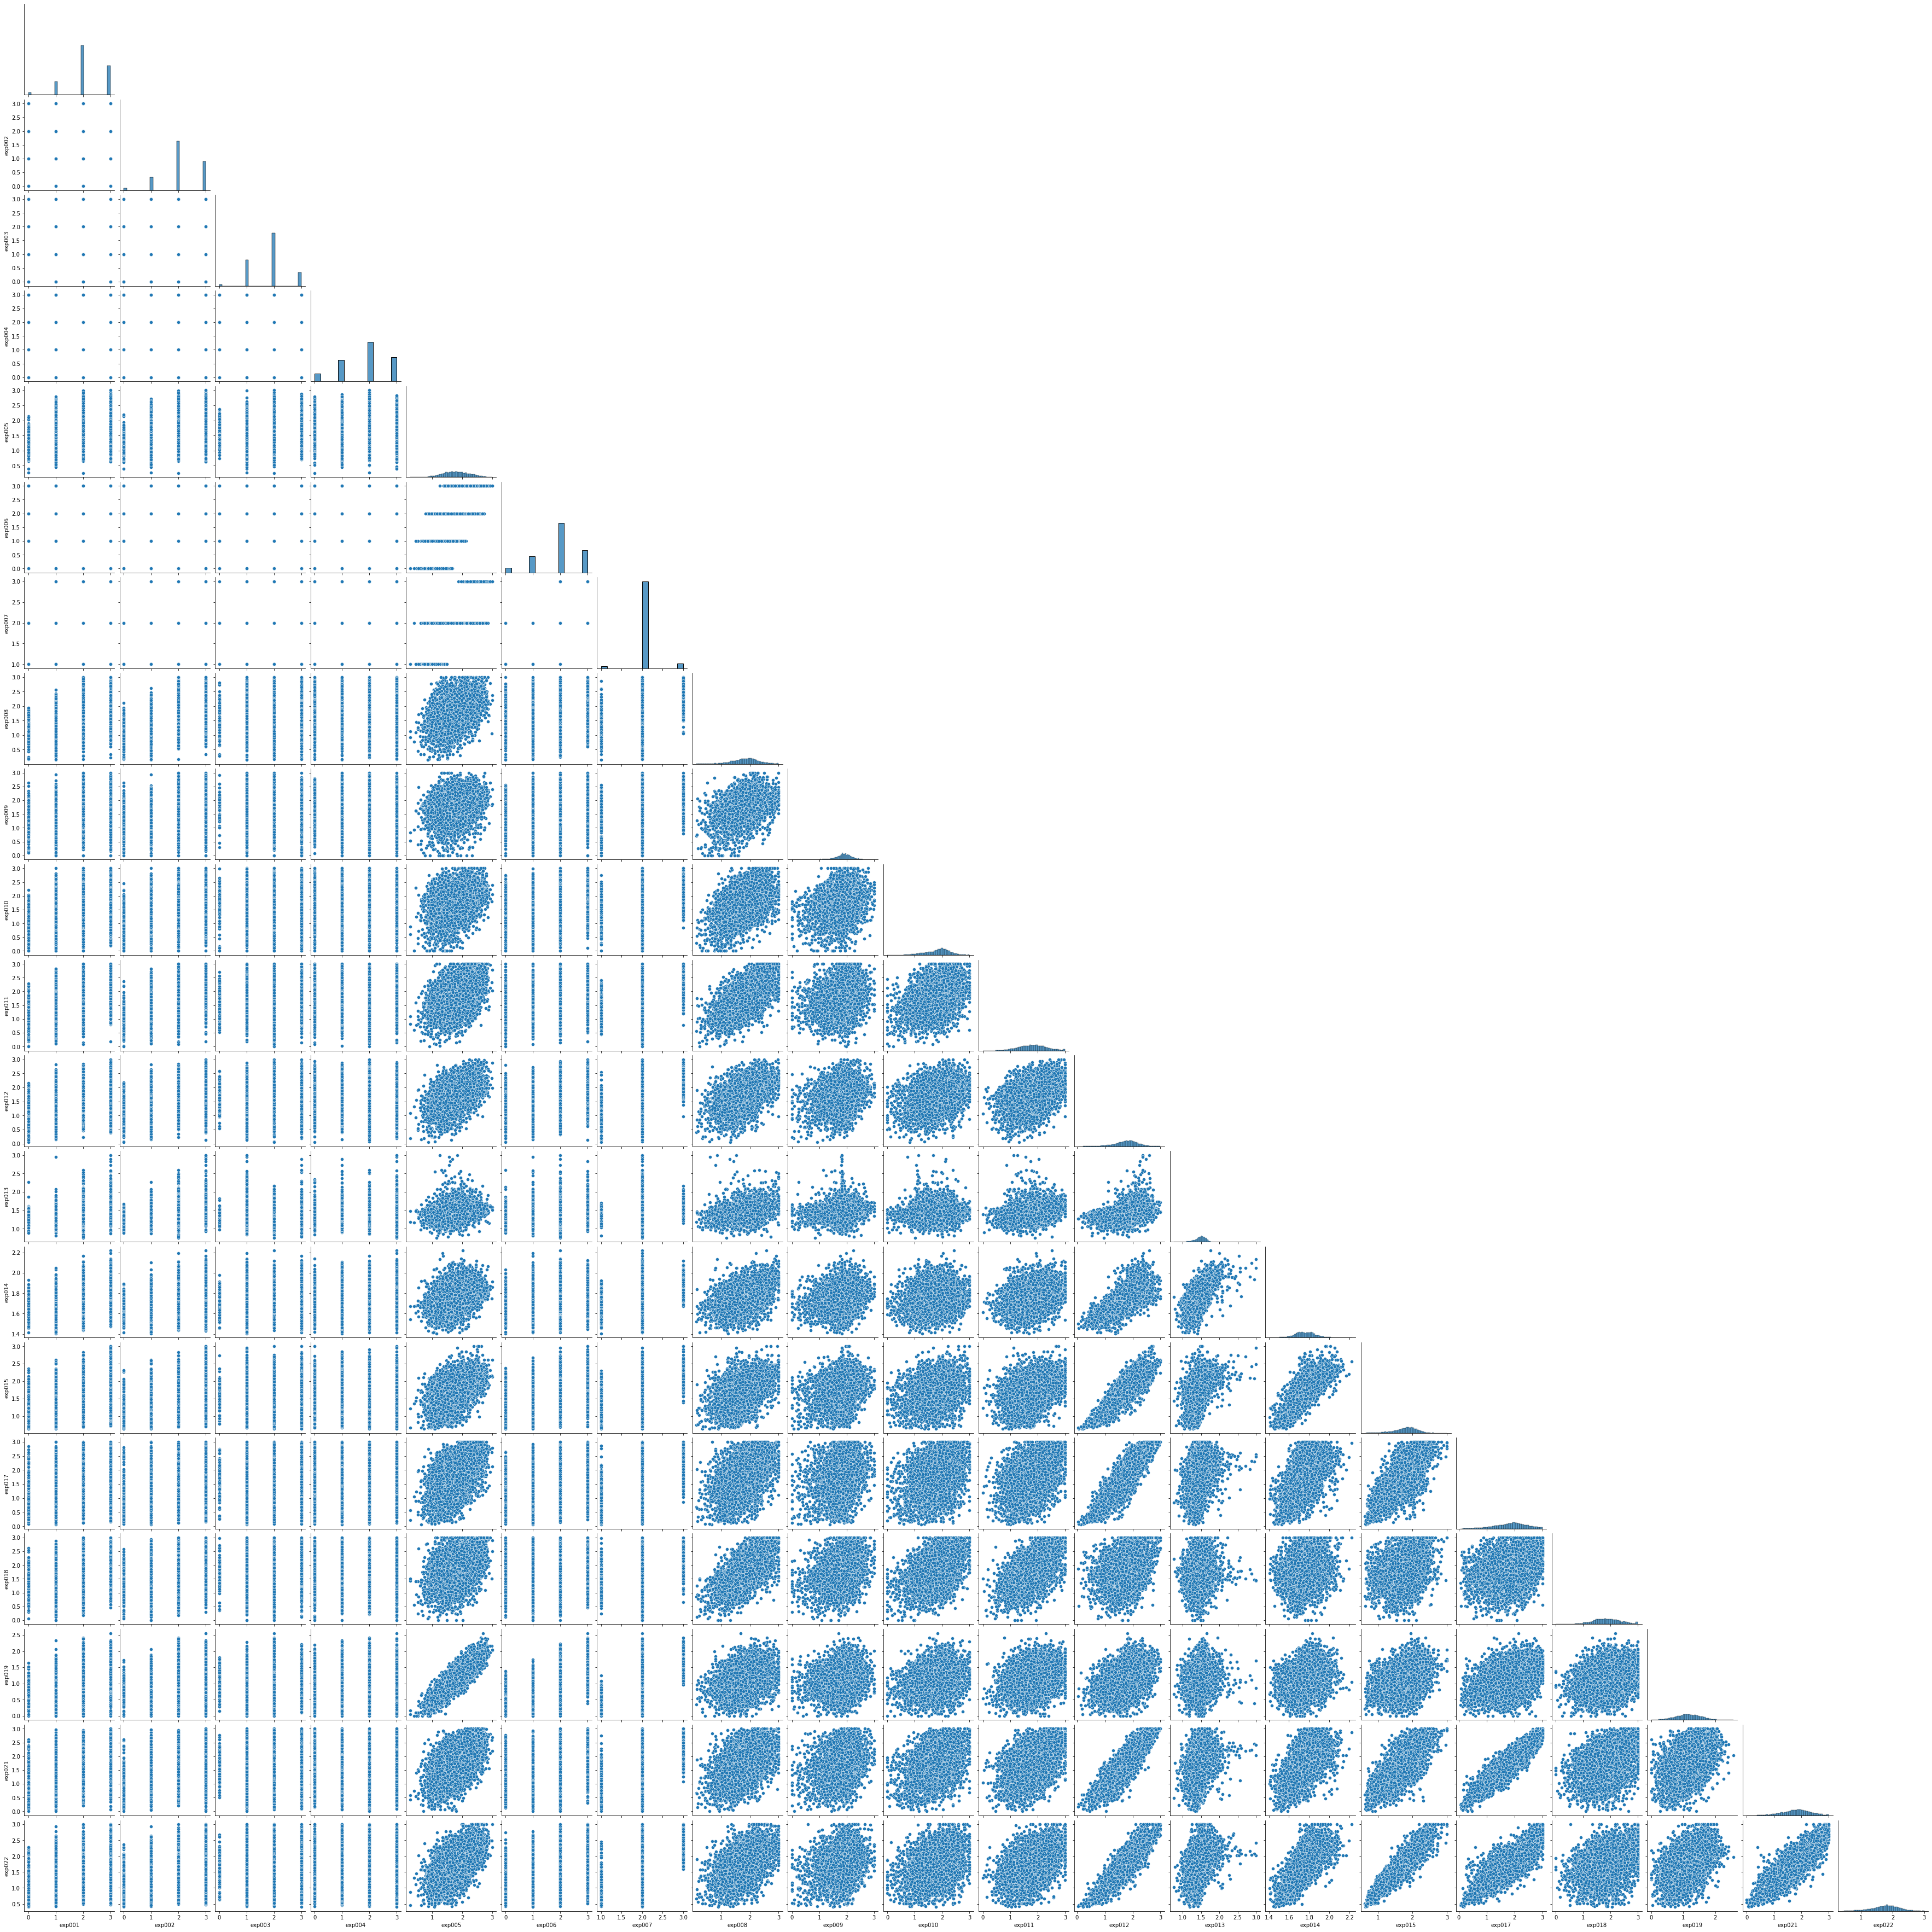

In [9]:
plt.figure(figsize=(8.5, 8.5))
sns.pairplot(submissions, corner=True)
sns.despine()